In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.cluster import KMeans

In [4]:
fb_data = pd.read_csv('data/full_body.csv')

# LDA

In [5]:
kmeans = KMeans(n_clusters=10, random_state=42)

# Fit KMeans to the data
kmeans.fit(fb_data)

# Get cluster assignments and cluster centers
labels = kmeans.labels_
centers = kmeans.cluster_centers_

/home/webis/miniconda3/envs/pifpaf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [6]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(fb_data, labels)

In [7]:
centers_lda = lda.transform(centers)

/home/webis/miniconda3/envs/pifpaf/lib/python3.8/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


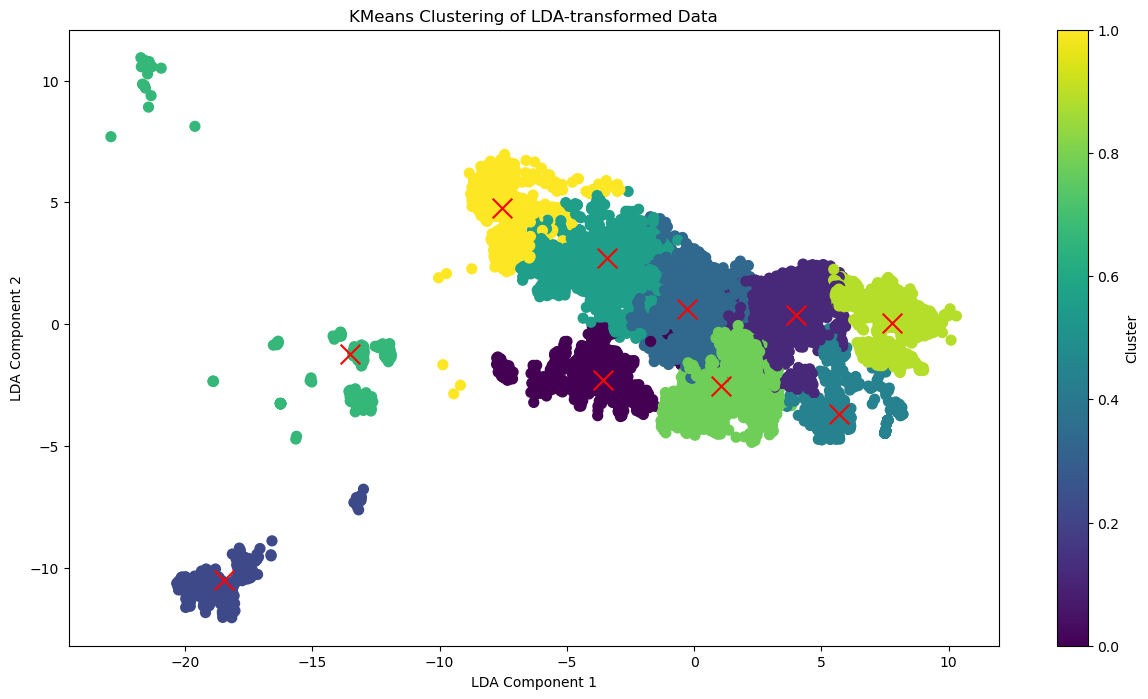

In [8]:
# Plot the clusters
plt.figure(figsize=(15, 8))
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(centers_lda[:, 0], centers_lda[:, 1], c='red', marker='x', s=200, label='Cluster Centers')
plt.title('KMeans Clustering of LDA-transformed Data')
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.colorbar(label='Cluster')
plt.show()

# T-SNE

In [9]:
from sklearn.manifold import TSNE

In [10]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(fb_data, labels)

In [11]:
t_sne = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3)

X_tsne = t_sne.fit_transform(fb_data)
Xc_tsne = t_sne.fit_transform(centers)

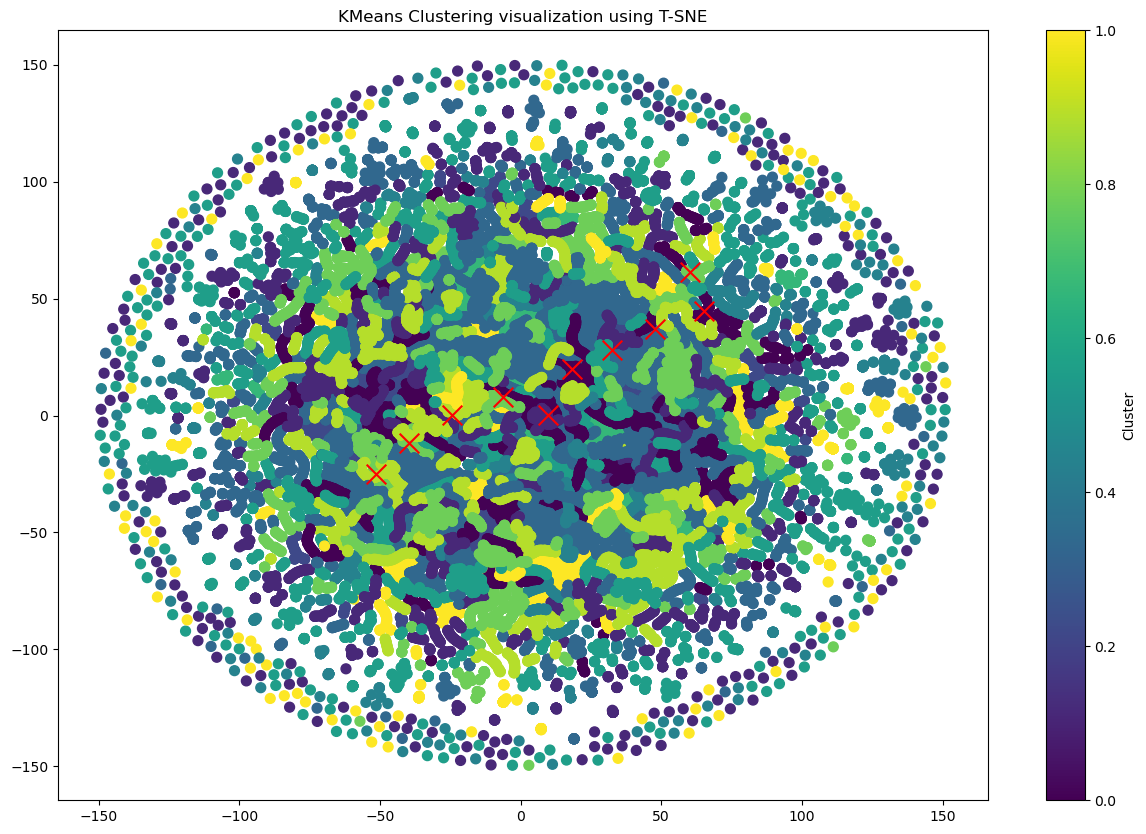

In [14]:
# Plot the clusters
plt.figure(figsize=(15, 10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(Xc_tsne[:, 0], Xc_tsne[:, 1], c='red', marker='x', s=200, label='Cluster Centers')
plt.title('KMeans Clustering visualization using T-SNE')
plt.colorbar(label='Cluster')
plt.show()

# UMAP

In [15]:
import umap

reducer = umap.UMAP(n_neighbors=30, min_dist=0.1, n_components=2, metric='euclidean')

X_umap = reducer.fit_transform(fb_data)
Xc_umap = reducer.fit_transform(centers)

/home/webis/miniconda3/envs/pifpaf/lib/python3.8/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/webis/miniconda3/envs/pifpaf/lib/python3.8/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/webis/miniconda3/envs/pifpaf/lib/python3.8/site-packages/umap/dist

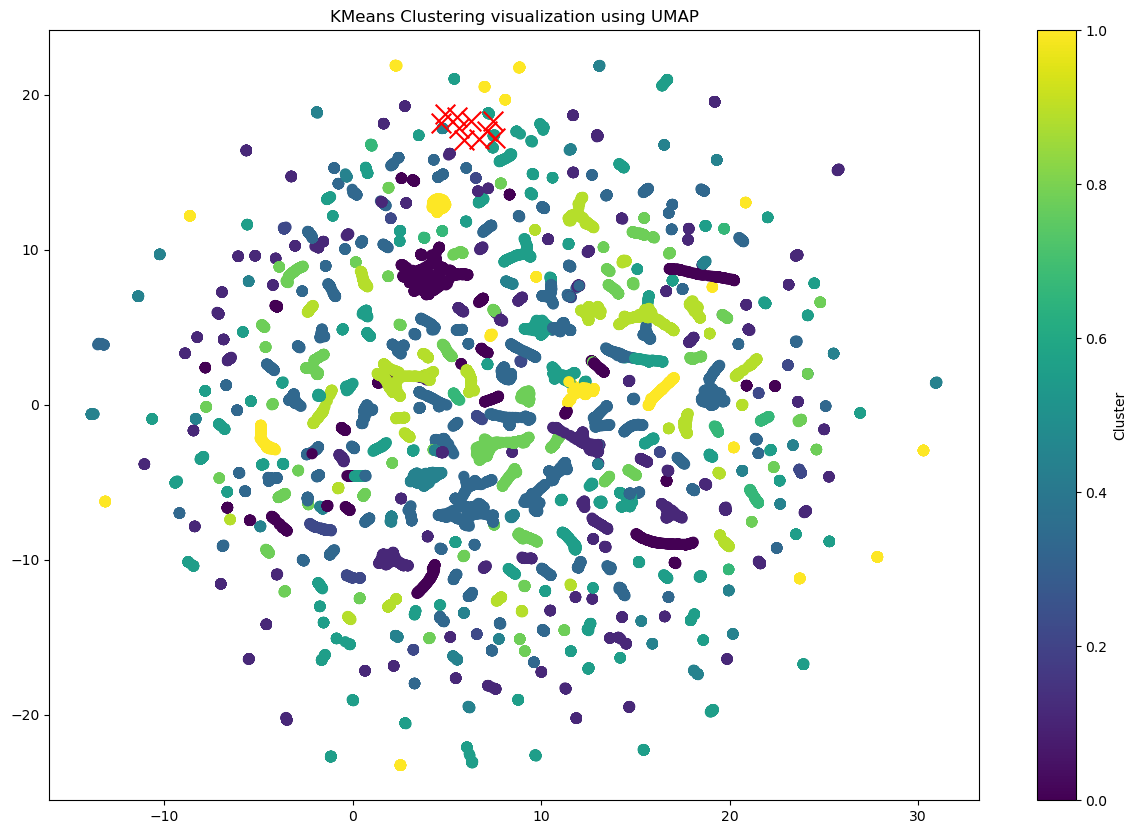

In [16]:
# Plot the clusters
plt.figure(figsize=(15, 10))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(Xc_umap[:, 0], Xc_umap[:, 1], c='red', marker='x', s=200, label='Cluster Centers')
plt.title('KMeans Clustering visualization using UMAP')
plt.colorbar(label='Cluster')
plt.show()

# Autoencoders

In [35]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras import Sequential

In [36]:
#zero mean and unit variance
data = (fb_data - np.mean(fb_data, axis=0)) / np.std(fb_data, axis=0)

In [37]:
data.shape

(26469, 34)

In [ ]:
#input_layer = Input(shape=(34,))
#
#encoder_layer1 = Dense(17, activation='relu')(input_layer)
#encoder_layer2 = Dense(8, activation='relu')(encoder_layer1)
#encoder_layer3 = Dense(4, activation='relu')(encoder_layer2)
#encoded = Dense(2, activation='relu')(encoder_layer3)
#
#decoder_layer1 = Dense(4, activation='relu')(encoded)
#decoder_layer2 = Dense(8, activation='relu')(decoder_layer1)
#decoder_layer3 = Dense(17, activation='relu')(decoder_layer2)
#decoded = Dense(34, activation='sigmoid')(decoder_layer3)
#
#autoencoder = Model(input_layer, decoded)

In [38]:
input_layer = Input(shape=(34,))

encoded = Dense(2, activation='relu')(input_layer)
decoded = Dense(34, activation='sigmoid')(encoded)

autoencoder = Model(input_layer, decoded)

In [39]:
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(data, data, epochs=15, batch_size=32)

Epoch 1/15
828/828 [==============================] - 13s 11ms/step - loss: 0.7754
Epoch 2/15
828/828 [==============================] - 9s 11ms/step - loss: 0.6568
Epoch 3/15
828/828 [==============================] - 11s 13ms/step - loss: 0.6256
Epoch 4/15
828/828 [==============================] - 11s 13ms/step - loss: 0.6185
Epoch 5/15
828/828 [==============================] - 12s 14ms/step - loss: 0.6177
Epoch 6/15
828/828 [==============================] - 9s 11ms/step - loss: 0.6171
Epoch 7/15
828/828 [==============================] - 8s 10ms/step - loss: 0.6162
Epoch 8/15
828/828 [==============================] - 8s 10ms/step - loss: 0.6155
Epoch 9/15
828/828 [==============================] - 9s 10ms/step - loss: 0.6149
Epoch 10/15
828/828 [==============================] - 11s 14ms/step - loss: 0.6143
Epoch 11/15
828/828 [==============================] - 8s 10ms/step - loss: 0.6142
Epoch 12/15
828/828 [==============================] - 9s 11ms/step - loss: 0.6137
Epoch 13

In [40]:
encoder = Model(input_layer, encoded)
reduced_data = encoder.predict(data)

828/828 [==============================] - 6s 7ms/step


In [41]:
#zero mean and unit variance
data_center = (centers - np.mean(centers, axis=0)) / np.std(centers, axis=0)
reduced_center = encoder.predict(data_center)

1/1 [==============================] - 0s 177ms/step


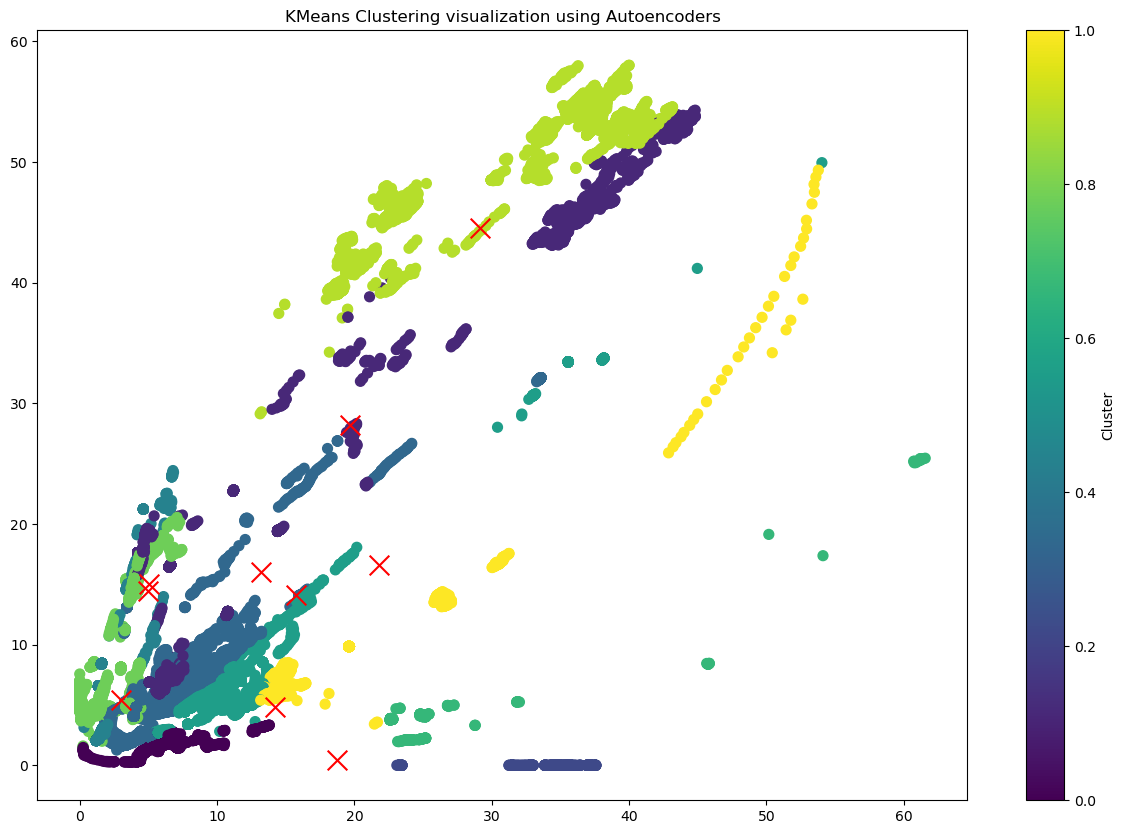

In [42]:
# Plot the clusters
plt.figure(figsize=(15, 10))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(reduced_center[:, 0], reduced_center[:, 1], c='red', marker='x', s=200, label='Cluster Centers')
plt.title('KMeans Clustering visualization using Autoencoders')
plt.colorbar(label='Cluster')
plt.show()